In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import thinkstats2_mod
import thinkplot

import statsmodels.formula.api as smf

In [2]:
dct = thinkstats2_mod.ReadStataDct('GSS/GSS.dct')
df = dct.ReadFixedWidth('GSS/GSS.dat')
print('Total number of respondents: %i' %(df.shape[0] + 1))

Total number of respondents: 62467


In [3]:
# Filter out years without relevant data
df = df[df.year >= 1974]
print('Number of respondents left: %i' %(df.shape[0] + 1))

# Filter out invalid polviews
df = df[df.polviews <= 7]
df = df[df.polviews > 0]

# Center polviews likert scale around 0
df['polviews'] = np.subtract(df['polviews'], 4)
print('Number of respondents left: %i' %(df.shape[0] + 1))

# Filter out marital status no answers
df = df[df.marital != 9]
print('Number of respondents left: %i' %(df.shape[0] + 1))

df_control = df.copy(deep=True)

Number of respondents left: 59350
Number of respondents left: 53082
Number of respondents left: 53064


In [66]:
pmf_vliberal = thinkstats2_mod.Pmf(df_control[df_control.polviews == -3].marital)
pmf_liberal  = thinkstats2_mod.Pmf(df_control[df_control.polviews == -2].marital)
pmf_sliberal = thinkstats2_mod.Pmf(df_control[df_control.polviews == -1].marital)
pmf_moderate = thinkstats2_mod.Pmf(df_control[df_control.polviews == 0].marital)
pmf_sconserv = thinkstats2_mod.Pmf(df_control[df_control.polviews == 1].marital)
pmf_conserv  = thinkstats2_mod.Pmf(df_control[df_control.polviews == 2].marital)
pmf_vconserv = thinkstats2_mod.Pmf(df_control[df_control.polviews == 3].marital)

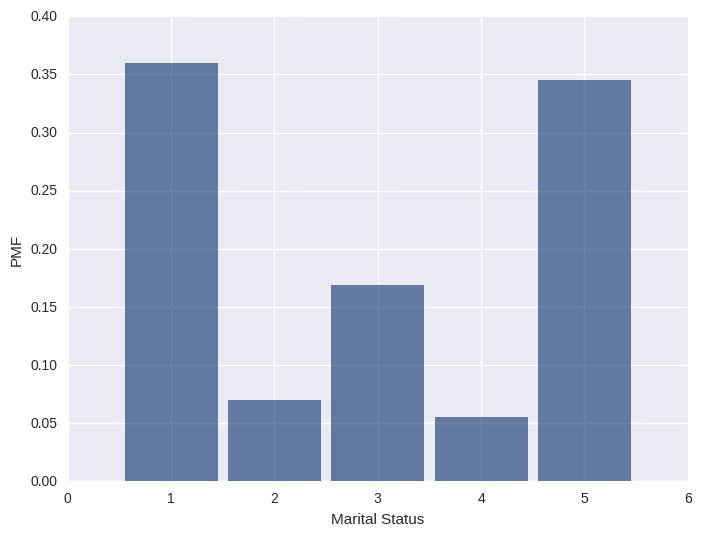

In [70]:
thinkplot.Hist(pmf_vliberal)
thinkplot.Config(xlabel='Marital Status', ylabel='PMF')
thinkplot.Show()

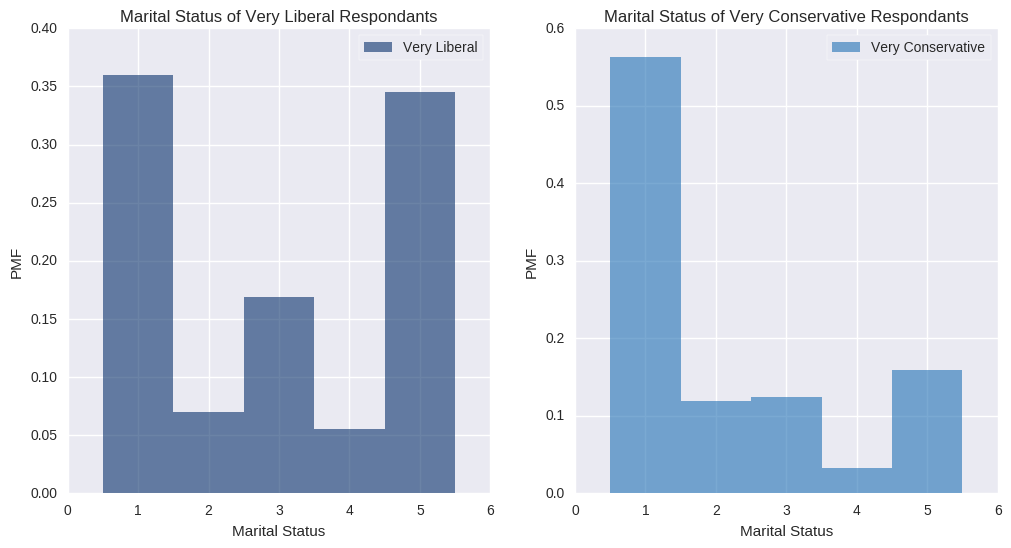

In [84]:
width = 1
thinkplot.PrePlot(cols=2)
thinkplot.SubPlot(1)
thinkplot.Hist(pmf_vliberal, align='center', width=width, label='Very Liberal')
thinkplot.Config(xlabel='Marital Status', ylabel='PMF', title='Marital Status of Very Liberal Respondants')

thinkplot.SubPlot(2)
# thinkplot.Hist(pmf_liberal, align='center', width=width, label='Liberal')
thinkplot.Hist(pmf_vconserv, align='center', width=width, label='Very Conservative')
thinkplot.Config(xlabel='Marital Status', ylabel='PMF', title='Marital Status of Very Conservative Respondants')
thinkplot.Show()